In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
file_path = '/content/drive/MyDrive'
print(os.listdir(file_path))

['Chapter 02.pdf', 'Untitled document (4).gdoc', 'Scanned_20170215-2334.pdf', 'Untitled document (3).gdoc', 'itc.gdoc', 'Untitled document (2).gdoc', 'statement (Autosaved).xlsx', 'AP Practical (VIVA).pdf', 'Omega.xlsx', 'Pp Watch.xlsx', 'Statement Revised.xlsx', 'jumping-math (1).pdf', 'learn-months-year.pdf', 'hour-telling-time-kim-kangaroo.pdf', 'practice-test-counting-money.pdf', 'greater-than-less-than-equal-to-1 (1).pdf', 'practice-test-word-problems1.pdf', 'Scan 4 Sep, 20-58.pdf', 'statement (Autosaved).gsheet', 'EXAMINATION SCHEDULE FALL_2018_29-JAN-2019.pdf', 'Untitled folder', 'imgtopdf_generated_0202191827032.pdf', 'imgtopdf_generated_0202191824002.pdf', 'imgtopdf_generated_0202191829051.pdf', 'imgtopdf_generated_0202191825017.pdf', 'record.xlsx', 'watches', 'Colab Notebooks', 'Untitled0.ipynb', 'Copy of Omega.xlsx', '15793475341544766204324108476047.jpg', 'EL-16106 (1).docx', 'Copy of SA P1: Prepare to Market Project Template.gslides', 'eps.gsheet', 'Tag 1.xlsx', 'owais-bas

In [ ]:
device=pd.read_csv('/content/drive/MyDrive/Copy of device.csv')
device.head()

,id,date,user,pc,file_tree,activity
0,{Z2Q8-K3AV28BE-9353JIRT},01/02/2010 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect
1,{C7F1-G7LE60RU-2483DAXS},01/02/2010 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect
2,{T9A4-D4RV69OF-1704NINW},01/02/2010 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect
3,{S8L0-O6QQ15NL-0636OYNV},01/02/2010 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect
4,{U0F1-R1FX27FM-6954TTVU},01/02/2010 07:33:55,JKS2444,PC-6961,NaN,Disconnect


In [ ]:
for i in device.columns:
  print(i,len(device[i].value_counts()))

id 1551828
date 1475524
user 788
pc 3829
file_tree 788
activity 2


In [ ]:
device['date']=pd.to_datetime(device['date'])

In [ ]:
device['day']=device['date'].dt.strftime('%A')

In [ ]:
device['month'] = device['date'].dt.month

In [ ]:
device['year'] = device['date'].dt.year

In [ ]:
device['hour'] = device['date'].dt.hour

In [ ]:
device.head()

,id,date,user,pc,file_tree,activity,day,month,year,hour
0,{Z2Q8-K3AV28BE-9353JIRT},2010-01-02 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect,Saturday,1,2010,7
1,{C7F1-G7LE60RU-2483DAXS},2010-01-02 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect,Saturday,1,2010,7
2,{T9A4-D4RV69OF-1704NINW},2010-01-02 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect,Saturday,1,2010,7
3,{S8L0-O6QQ15NL-0636OYNV},2010-01-02 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect,Saturday,1,2010,7
4,{U0F1-R1FX27FM-6954TTVU},2010-01-02 07:33:55,JKS2444,PC-6961,NaN,Disconnect,Saturday,1,2010,7


In [ ]:
label_encoder = LabelEncoder()
device['user_encoded'] = label_encoder.fit_transform(device['user'])


In [ ]:
device['activity_encoded'] = label_encoder.fit_transform(device['activity'])
device['pc_encoded'] = label_encoder.fit_transform(device['pc'])

In [ ]:
device['filetree_encoded'] = label_encoder.fit_transform(device['file_tree'])

In [ ]:
device['day_encoded']=label_encoder.fit_transform(device['day'])

In [ ]:
isolation_forest = IsolationForest(contamination=0.05)

In [ ]:
device.head()

,id,date,user,pc,file_tree,activity,day,month,year,hour,user_encoded,activity_encoded,pc_encoded,filetree_encoded,day_encoded
0,{Z2Q8-K3AV28BE-9353JIRT},2010-01-02 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect,Saturday,1,2010,7,657,0,2221,180,2
1,{C7F1-G7LE60RU-2483DAXS},2010-01-02 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect,Saturday,1,2010,7,394,0,2632,707,2
2,{T9A4-D4RV69OF-1704NINW},2010-01-02 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect,Saturday,1,2010,7,133,0,602,404,2
3,{S8L0-O6QQ15NL-0636OYNV},2010-01-02 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect,Saturday,1,2010,7,305,0,2429,692,2
4,{U0F1-R1FX27FM-6954TTVU},2010-01-02 07:33:55,JKS2444,PC-6961,NaN,Disconnect,Saturday,1,2010,7,394,1,2632,788,2


In [ ]:
numerical_columns = ['month','year','hour','user_encoded', 'activity_encoded', 'pc_encoded','filetree_encoded','day_encoded']

In [ ]:
isolation_forest.fit(device[numerical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [ ]:
device['anomaly_score'] = isolation_forest.decision_function(device[numerical_columns])
device['anomaly_label'] = isolation_forest.predict(device[numerical_columns])

In [ ]:
device.head()

,id,date,user,pc,file_tree,activity,day,month,year,hour,user_encoded,activity_encoded,pc_encoded,filetree_encoded,day_encoded,anomaly_score,anomaly_label
0,{Z2Q8-K3AV28BE-9353JIRT},2010-01-02 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect,Saturday,1,2010,7,657,0,2221,180,2,0.015986,1
1,{C7F1-G7LE60RU-2483DAXS},2010-01-02 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect,Saturday,1,2010,7,394,0,2632,707,2,0.028063,1
2,{T9A4-D4RV69OF-1704NINW},2010-01-02 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect,Saturday,1,2010,7,133,0,602,404,2,0.033106,1
3,{S8L0-O6QQ15NL-0636OYNV},2010-01-02 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect,Saturday,1,2010,7,305,0,2429,692,2,0.028136,1
4,{U0F1-R1FX27FM-6954TTVU},2010-01-02 07:33:55,JKS2444,PC-6961,NaN,Disconnect,Saturday,1,2010,7,394,1,2632,788,2,0.050779,1


In [ ]:
device['anomaly_label'].value_counts()

 1    1474237
-1      77591
Name: anomaly_label, dtype: int64

In [ ]:
output_path = '/content/drive/MyDrive/device_results.csv'

# Save the DataFrame as a CSV file
device.to_csv(output_path, index=False)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


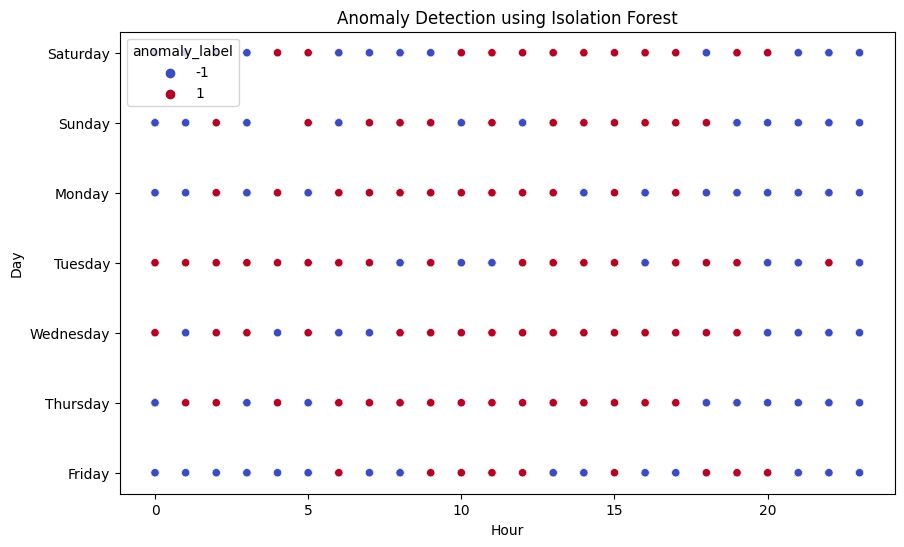

In [ ]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=device, x='hour', y='day', hue='anomaly_label', palette='coolwarm')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


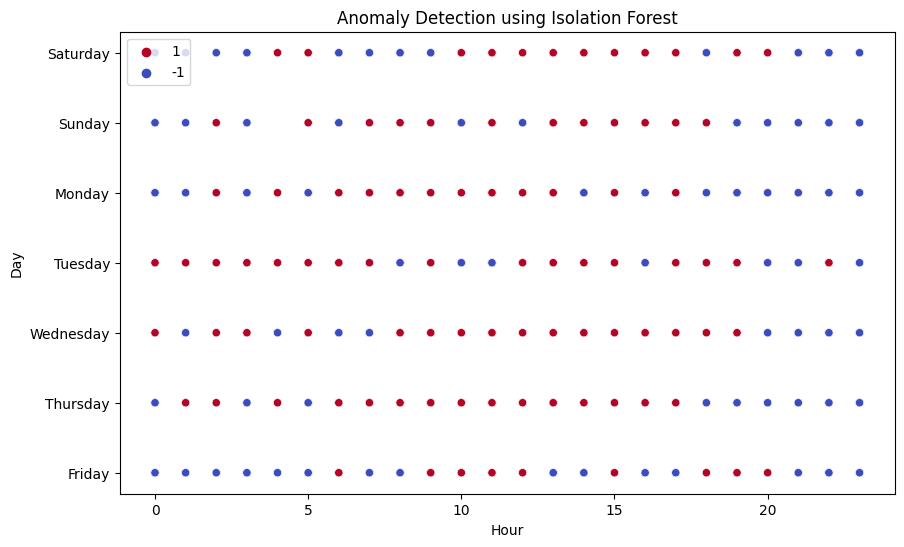

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already imported your data and created the scatterplot

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=device, x='hour', y='day', hue='anomaly_label', palette='coolwarm')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Hour')
plt.ylabel('Day')

# Get the current legend handles and labels
handles, labels = scatterplot.get_legend_handles_labels()

# Create a custom legend with swapped labels
custom_handles = [handles[1], handles[0]]  # Swapping the order of handles
custom_labels = ['1', '-1']  # Desired labels order

# Create the legend using custom handles and labels
plt.legend(custom_handles, custom_labels)

plt.show()
